In [1]:
import numpy as np
import matplotlib.pyplot as plt
import util

In [2]:
smgp = util.SMGP('../smgp.asm')
tracks = smgp.extract_track_data()

In [3]:
def get_curve_rles(track_name):
    curve_data_loc = util.extract_track_data_part('curve data', tracks[track_name])
    curve_data = smgp.extract_loc_data(curve_data_loc)
    return util.parse_curve_data(curve_data)

In [8]:
def parse_rotations(rles):
    rotation = 0
    rotations = []
    for length, curve, total_rot in rles:
        if curve > 0:
            total_rot = -total_rot
        rotations += list(np.linspace(rotation, rotation+total_rot, length+1)[1:])
        rotation = rotations[-1]
    rotations = np.mod(rotations, 1024)
    return rotations

In [5]:
# Debug same as memory

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

for chunk in chunks([hex(int(r))[2:].zfill(4) for r in parse_rotations(get_curve_rles('USA'))], 8):
    print(' '.join(chunk))

KeyError: 'USA'

### Render

In [6]:
def get_curve_radians(track_name):
    rotations = parse_rotations(get_curve_rles(track_name))
    rotations = rotations/1024*np.pi*2
    return -rotations

TypeError: startswith first arg must be str or a tuple of str, not NoneType

C:\Users\rapha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\rapha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


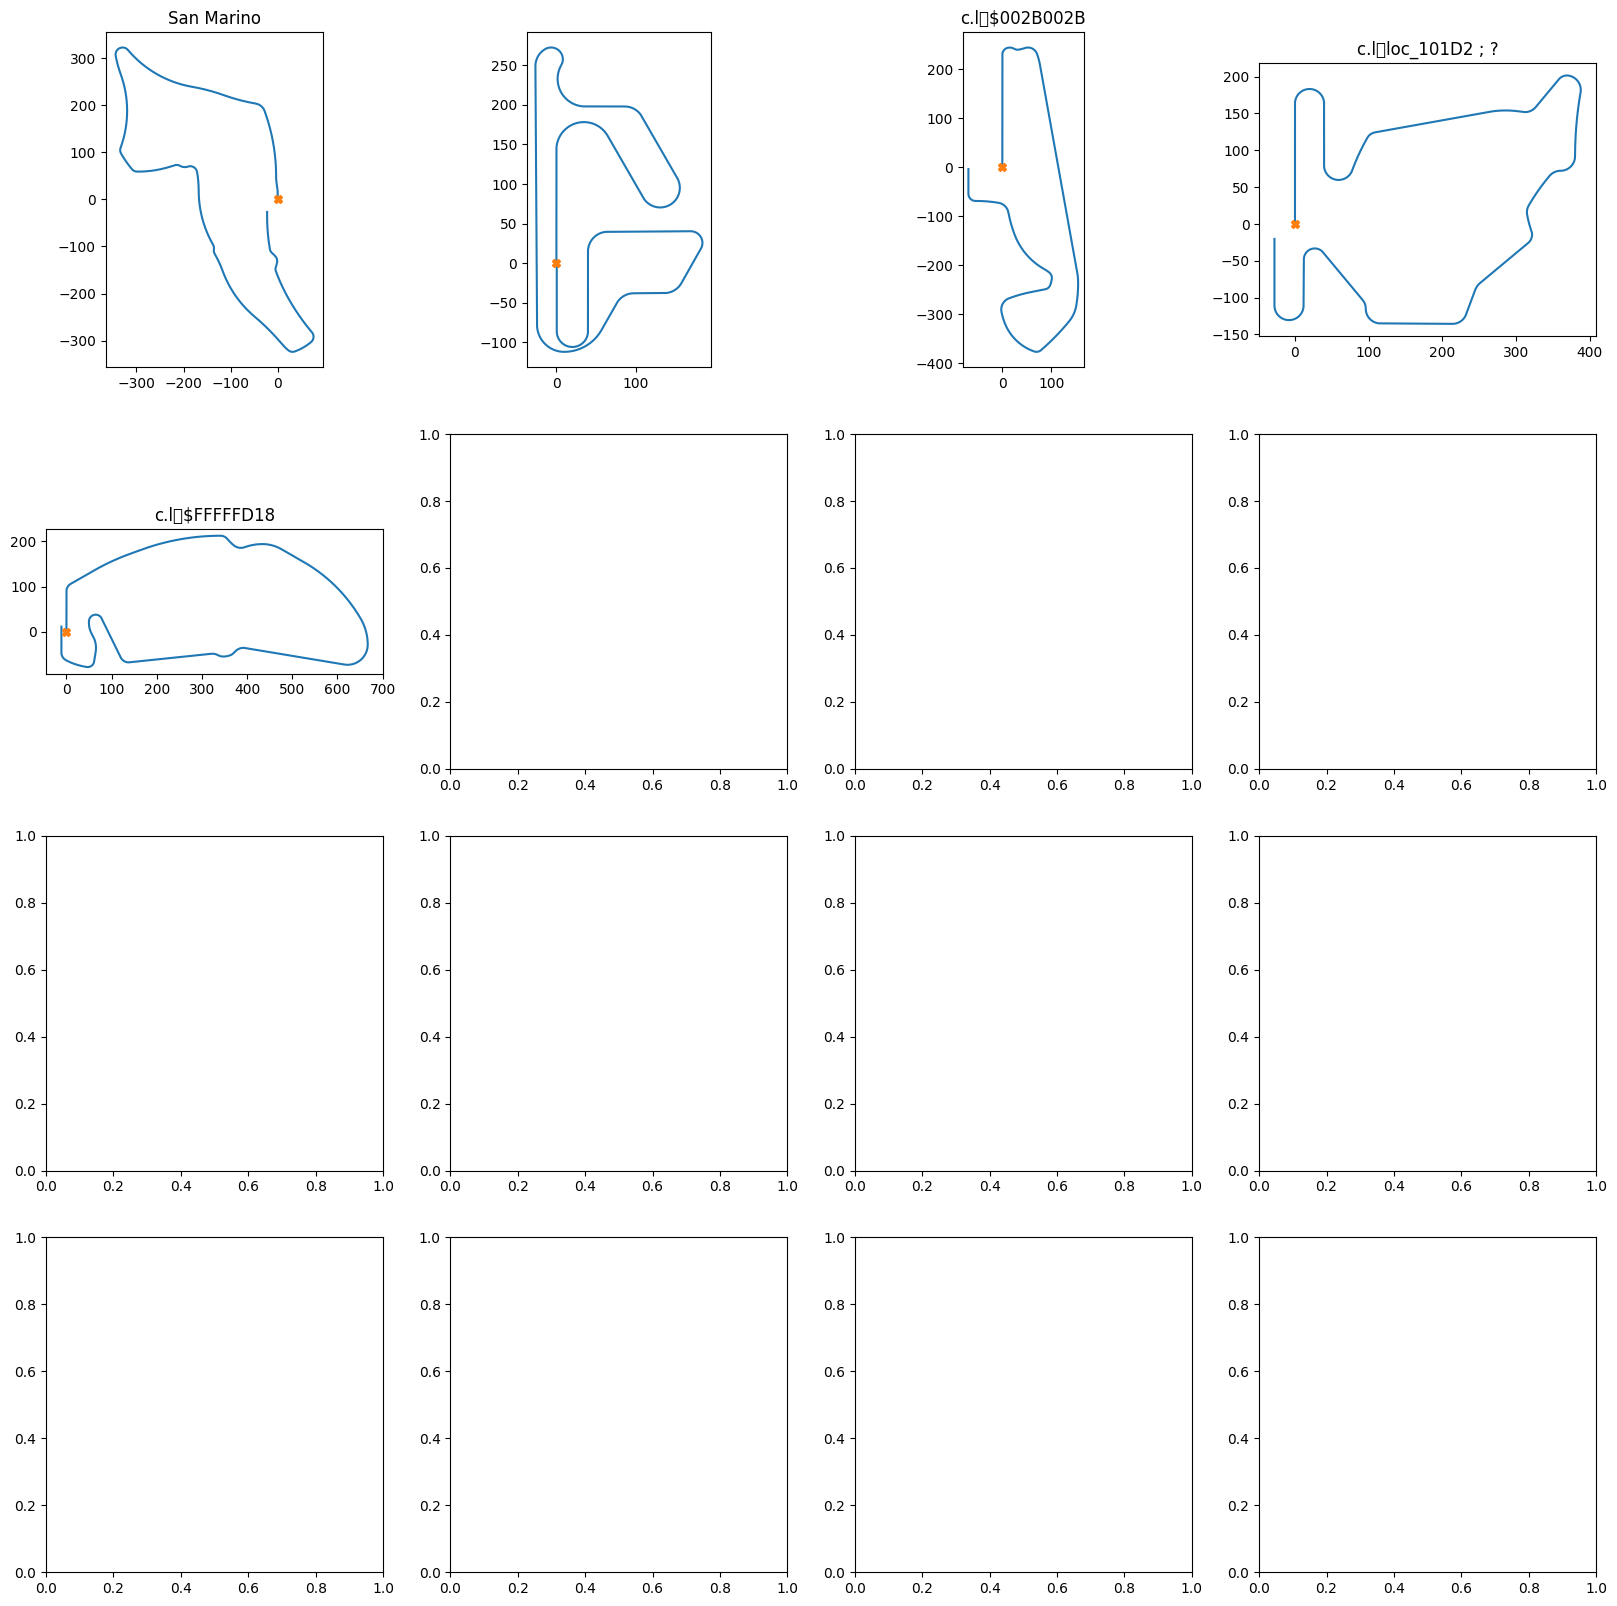

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for ax, track_name in zip(axes.flatten(), tracks.keys()):
    rotations = get_curve_radians(track_name)
    ax.plot(
        np.cumsum(np.sin(rotations)),
        np.cumsum(np.cos(rotations))
    )
    ax.plot(0, 0, 'X')
    ax.set_title(track_name)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()